Problem Statement: To sanction loan to the customers or not.

Pre-processing steps:
1. Filling missing values
    categorical values - mode;
    continuous values - mean, median

2. Convert categories into numbers.
3. Perform scaling of data (generally between 0 to 1).
   

In [74]:
# importing libraries
import pandas as pd
import numpy as np

In [75]:
# to check the version of pandas
print('Version of Pandas:',pd.__version__)

Version of Pandas: 1.4.2


In [76]:
# reading the file
loan = pd.read_csv("loan_data.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
# to get the last 5 rows
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [78]:
# to get the dimensions of the data
loan.shape

(614, 13)

In [79]:
# to check for null values or missing values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
# to check for data types of variables
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Filling missing values

Categorical Data: Mode

In [81]:
# calculating mode
print(loan['Gender'].mode()[0])
print(loan['Married'].mode()[0])
print(loan['Dependents'].mode()[0])
print(loan['Self_Employed'].mode()[0])

Male
Yes
0
No


In [82]:
# filling missing data with mode
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace = True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace = True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace = True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace = True)

Continuous Data : Mean

In [83]:
# calculating mean
print(loan['LoanAmount'].mean())
print(loan['Loan_Amount_Term'].mean())
print(loan['Credit_History'].mean())

146.41216216216216
342.0
0.8421985815602837


In [84]:
# filling missing data with mean
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace = True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(), inplace = True)
loan['Credit_History'].fillna(loan['Credit_History'].mean(), inplace = True)


In [85]:
# rechecking for missing values
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Converting categories into numbers

In [86]:
# to count values
print(loan['Gender'].value_counts())
print(loan['Married'].value_counts())
print(loan['Dependents'].value_counts())
print(loan['Education'].value_counts())
print(loan['Self_Employed'].value_counts())
print(loan['Property_Area'].value_counts())
print(loan['Loan_Status'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [87]:
# mapping of categories with numbers
loan['Gender'] = loan['Gender'].map({'Male': 0, 'Female':1})
loan['Married'] = loan['Married'].map({'No': 0, 'Yes': 1})
loan['Dependents'] = loan['Dependents'].map({'0':0, '1':1, '3+':2}) 
loan['Education'] = loan['Education'].map({'Not Graduate': 0, 'Graduate': 1})
loan['Self_Employed'] = loan['Self_Employed'].map({'No': 0, 'Yes':1})
loan['Property_Area'] = loan['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
loan['Loan_Status'] = loan['Loan_Status'].map({'N':0, 'Y':1})

In [88]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# Normalization of Data (Scaling of Data)

X(norm) = X - X(min) / X(max) - X(min)

In [89]:
# bringing all the variables in the range of 0 to 1
for i in loan.columns[1:]:
    loan[i] = (loan[i] - loan[i].min()) /(loan[i].max() - loan[i].min())

In [90]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.5,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.0,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.0,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.0,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [91]:
# saving the pre-processed data 
loan.to_csv("processed_loan_data.csv", index = False)

# Steps to build a Neural Network

1. Loading the dataset.
2. Creating training data and test data/validation data.
3. Defining architecture of the model.
4. Compiling the model(define loss/cost function and optimizer)
5. Training the model( Define no. of. epochs)
6. Evaluating model performance on both training and testing dataset.

In [60]:
# loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [59]:
# reading processed loan data
df = pd.read_csv("processed_loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.5,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.0,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.0,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.0,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [34]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,1.0,0.0,0.0,1.0,0.0,0.034014,0.00000,0.089725,0.743590,1.0,0.0,1.0
610,LP002979,0.0,1.0,1.0,1.0,0.0,0.048930,0.00000,0.044863,0.358974,1.0,0.0,1.0
611,LP002983,0.0,1.0,0.5,1.0,0.0,0.097984,0.00576,0.353111,0.743590,1.0,1.0,1.0
612,LP002984,0.0,1.0,NaN,1.0,0.0,0.091936,0.00000,0.257598,0.743590,1.0,1.0,1.0
613,LP002990,1.0,0.0,0.0,1.0,1.0,0.054830,0.00000,0.179450,0.743590,0.0,0.5,0.0


In [35]:
# checking for NaN values
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents           101
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [36]:
# replacing NaN values with mode
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [37]:
# checking for NaN values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
# checking data types
df.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [39]:
# dropping irrelevant columns
df = df.drop('Loan_ID', axis=1)
print(df.shape)
df.head()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.5,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [40]:
# separating independent and dependent features
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [41]:
# splitting dataset into training set and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify = df['Loan_Status'], random_state = 10, test_size = 0.2)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(491, 11) (491,)
(123, 11) (123,)


Defining architecture of the model

In [42]:
import keras
import tensorflow as tf

In [43]:
print('Version pf Keras:',keras.__version__)
print('Version pf Tensorflow:',tf.__version__)
print('Version of sklearn:',sklearn.__version__)

Version pf Keras: 2.9.0
Version pf Tensorflow: 2.9.1
Version of sklearn: 1.0.2


In [61]:
# create a sequential model
from keras.models import Sequential
from keras.layers import InputLayer,Dense

In [62]:
# number of input neurons
xtrain.shape

(491, 11)

In [46]:
# input neurons to be taken
input_neurons = xtrain.shape[1]
print(input_neurons)

11


In [47]:
# number of output neuron will be 1 since it is binary classification problem
output_neuron = 1

In [48]:
# number of hidden layers and neurons are hyperparameter so we can pick them on our own
hidden_layer = 2
neurons_hl_1 = 10
neurons_hl_2 = 5

In [49]:
# create architecture
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neurons_hl_1, activation= 'relu' ))
model.add(Dense(units=neurons_hl_2, activation = 'relu'))
model.add(Dense(units=output_neuron, activation = 'sigmoid'))

In [50]:
# summary of the model # Trainable params: 181 (weights)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [51]:
# number of parameters between input layer and 1st hidden layer (bias will also be added which is 10)
input_neurons*neurons_hl_1 + 10

120

In [52]:
# number of parameters between 1st hidden layer and 2nd hidden layer (bias will also be added which is 5)
neurons_hl_1*neurons_hl_2 + 5

55

In [53]:
# number of parameters between 2nd hidden layer and output layer (bias will also be added which is 1)
neurons_hl_2*output_neuron + 1

6

In [54]:
# compiling the model
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [70]:
# training the model
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 12ms/step - loss: 0.4681 - accuracy: 0.8126 - val_loss: 0.4791 - val_accuracy: 0.8130
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4677 - accuracy: 0.8126 - val_loss: 0.4799 - val_accuracy: 0.8130
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4666 - accuracy: 0.8126 - val_loss: 0.4783 - val_accuracy: 0.8130
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4661 - accuracy: 0.8126 - val_loss: 0.4782 - val_accuracy: 0.8130
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4656 - accuracy: 0.8126 - val_loss: 0.4780 - val_accuracy: 0.8130
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4651 - accuracy: 0.8126 - val_loss: 0.4786 - val_accuracy: 0.8130
Epoch 7/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4647 - accuracy: 0.8126 - val_loss: 0.4770 - val_accuracy: 0.8130
Epoch 8/50
16/16 [=

In [93]:
# prediction on test data
ypred = model.predict(xtest)
ypred = np.round_(ypred) # used to round off values
ypred

4/4 [==============================] - 0s 5ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [84]:
ytest

507    0.0
493    1.0
434    1.0
125    1.0
294    1.0
      ... 
82     0.0
295    1.0
369    0.0
450    0.0
363    1.0
Name: Loan_Status, Length: 123, dtype: float64

In [94]:
# calculating accuracy score on the validation set
acc = accuracy_score(ytest, ypred)
print(acc*100)

81.30081300813008


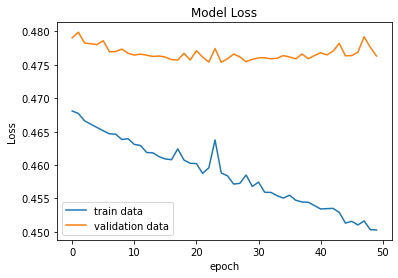

In [97]:
# visualizing data for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train data','validation data'])
plt.show()


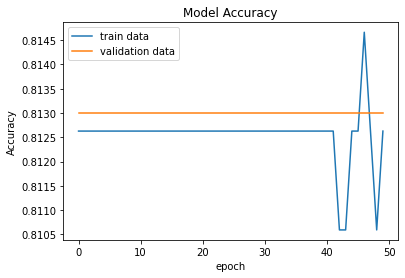

In [98]:
# visualizing data for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train data','validation data'])
plt.show()

Result: The accuracy of the model is 81%